In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import 

In [5]:
b17013 = pd.read_csv("B17013_cleaned.csv")
b17013

,Census Tract,Value,Total,Income in the past 12 months below poverty level,Married-couple family below poverty,Married-couple family below poverty: 2 people,Married-couple family below poverty: 3 to 4 people,Married-couple family below poverty: 5 to 6 people,Married-couple family below poverty: 7 or more people,Other families below poverty,...,"Male householder, no spouse present above poverty",Male householder above poverty: 2 people,Male householder above poverty: 3 to 4 people,Male householder above poverty: 5 to 6 people,Male householder above poverty: 7 or more people,"Female householder, no spouse present above poverty",Female householder above poverty: 2 people,Female householder above poverty: 3 to 4 people,Female householder above poverty: 5 to 6 people,Female householder above poverty: 7 or more people
0,1.01,Estimate,191,0,0,0,0,0,0,0,...,0,0,0,0,0,25,13,12,0,0
1,1.01,Margin of Error,61,13,13,13,13,13,13,13,...,13,13,13,13,13,30,22,21,13,13
2,1.02,Estimate,611,83,0,0,0,0,0,83,...,20,20,0,0,0,58,58,0,0,0
3,1.02,Margin of Error,130,57,13,13,13,13,13,57,...,25,25,13,13,13,60,60,13,13,13
4,2.01,Estimate,682,79,79,7,0,0,72,0,...,62,0,62,0,0,63,51,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,9818.00,Margin of Error,19,13,13,13,13,13,13,13,...,13,13,13,13,13,18,18,13,13,13
466,9819.00,Estimate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
467,9819.00,Margin of Error,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
468,9901.01,Estimate,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will show the result when we ignore the different types of family (married, male only or female only), the number of counts for different size family

In [6]:
below_2 = ['Married-couple family below poverty: 2 people','Male householder below poverty: 2 people','Female householder below poverty: 2 people']
       
below_34 = ['Married-couple family below poverty: 3 to 4 people','Male householder below poverty: 3 to 4 people','Female householder below poverty: 3 to 4 people']       

below_56 = ['Married-couple family below poverty: 5 to 6 people','Male householder below poverty: 5 to 6 people','Female householder below poverty: 5 to 6 people']

below_7 = ['Married-couple family below poverty: 7 or more people','Male householder below poverty: 7 or more people','Female householder below poverty: 7 or more people']

above_2 = ['Married-couple family above poverty: 2 people','Male householder above poverty: 2 people','Female householder above poverty: 2 people']
       
above_34 = ['Married-couple family above poverty: 3 to 4 people','Male householder above poverty: 3 to 4 people','Female householder above poverty: 3 to 4 people']       

above_56 = ['Married-couple family above poverty: 5 to 6 people','Male householder above poverty: 5 to 6 people','Female householder above poverty: 5 to 6 people']

above_7 = ['Married-couple family above poverty: 7 or more people','Male householder above poverty: 7 or more people','Female householder above poverty: 7 or more people']


2 people below poverty: 34.88510638297872
3-4 people below poverty: 34.53191489361702
5-6 people below poverty: 10.336170212765957
7 people below poverty: 1.923404255319149
2 people above poverty: 270.2808510638298
3-4 people above poverty: 235.21702127659574
5-6 people above poverty: 57.02127659574468
7 people above poverty: 9.540425531914893


<Figure size 576x360 with 0 Axes>

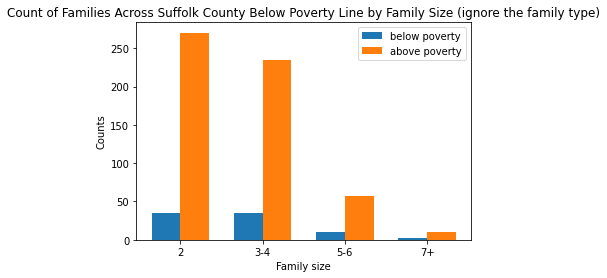

In [7]:
print("2 people below poverty:",b17013[b17013['Value'] == 'Estimate'][below_2].mean().sum())
print("3-4 people below poverty:",b17013[b17013['Value'] == 'Estimate'][below_34].mean().sum())
print("5-6 people below poverty:",b17013[b17013['Value'] == 'Estimate'][below_56].mean().sum())
print("7 people below poverty:",b17013[b17013['Value'] == 'Estimate'][below_7].mean().sum())
print("2 people above poverty:",b17013[b17013['Value'] == 'Estimate'][above_2].mean().sum())
print("3-4 people above poverty:",b17013[b17013['Value'] == 'Estimate'][above_34].mean().sum())
print("5-6 people above poverty:",b17013[b17013['Value'] == 'Estimate'][above_56].mean().sum())
print("7 people above poverty:",b17013[b17013['Value'] == 'Estimate'][above_7].mean().sum())

below_poverty = [b17013[b17013['Value'] == 'Estimate'][below_2].mean().sum(),b17013[b17013['Value'] == 'Estimate'][below_34].mean().sum(),\
                b17013[b17013['Value'] == 'Estimate'][below_56].mean().sum(),b17013[b17013['Value'] == 'Estimate'][below_7].mean().sum()]
above_poverty = [b17013[b17013['Value'] == 'Estimate'][above_2].mean().sum(),b17013[b17013['Value'] == 'Estimate'][above_34].mean().sum(),\
                b17013[b17013['Value'] == 'Estimate'][above_56].mean().sum(),b17013[b17013['Value'] == 'Estimate'][above_7].mean().sum()]

labels = ['2', '3-4', '5-6', '7+']
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(8, 5))
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, below_poverty, width, label='below poverty')
rects2 = ax.bar(x + width/2, above_poverty, width, label='above poverty')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Family size')
ax.set_ylabel('Counts')
ax.set_title('Count of Families Across Suffolk County Below Poverty Line by Family Size (ignore the family type)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# plt.bar(below_poverty,
#        above_poverty)
# plt.xlabel('Family Size')
# plt.ylabel('Mean estimate')
# plt.title('Count of Families Across Suffolk County Below Poverty Line by Family Size (ignore the family type)')
# plt.show()

Calculate the ratio between below the poverty and above poverty for each family size

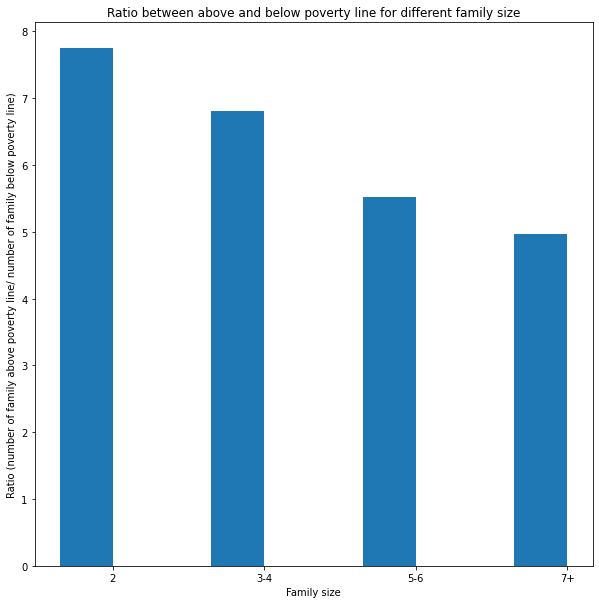

In [11]:
ratio = np.array(above_poverty)/np.array(below_poverty)
plt.figure(figsize=(10,10))
plt.bar(x - width/2, ratio, width, label='Ratio')
plt.xticks(x,labels)
plt.xlabel('Family size')
plt.ylabel('Ratio (number of family above poverty line/ number of family below poverty line)')
plt.title("Ratio between above and below poverty line for different family size")
plt.savefig("ratio_result.jpg")

<Figure size 1152x1152 with 0 Axes>

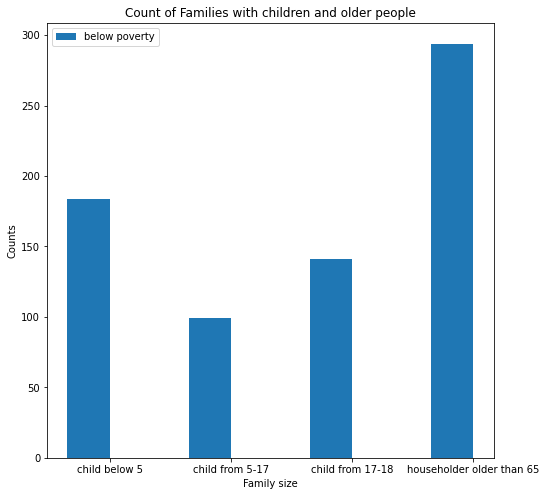

In [12]:
import numpy as np
import matplotlib.pyplot as plt
labels = ['child below 5', 'child from 5-17', 'child from 17-18', 'householder older than 65']
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(16, 16))
fig, ax = plt.subplots(figsize=(8, 8))
below_poverty = [184,99,424-99-184,294]
rects1 = ax.bar(x - width/2, below_poverty, width, label='below poverty')
#rects2 = ax.bar(x + width/2, above_poverty, width, label='above poverty')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Family size')
ax.set_ylabel('Counts')
ax.set_title('Count of Families with children and older people')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('child_older.png')